In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # One-hot encode the label

In [4]:

# Build a small CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3297 - loss: 1.8072 - val_accuracy: 0.5301 - val_loss: 1.3192
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5539 - loss: 1.2543 - val_accuracy: 0.6097 - val_loss: 1.1125
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6260 - loss: 1.0592 - val_accuracy: 0.6416 - val_loss: 1.0436
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6660 - loss: 0.9585 - val_accuracy: 0.6657 - val_loss: 0.9531
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6900 - loss: 0.8774 - val_accuracy: 0.6841 - val_loss: 0.9202
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7160 - loss: 0.8130 - val_accuracy: 0.6711 - val_loss: 0.9529
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7309 - loss: 0.7640 - val_accuracy: 0.6901 - val_loss: 0.8897
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7508 - loss: 0.7134 - val_accuracy: 0

In [7]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7177 - loss: 0.8350
Test accuracy: 0.7161999940872192


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select some images from the test set
num_images = 5
indices = np.random.choice(x_test.shape[0], num_images)
images = x_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)

In [12]:
# Predict the labels for these images
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


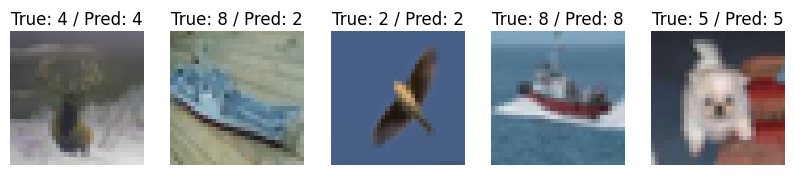

In [13]:
# Plot the images with their true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i])
    plt.title(f"True: {true_labels[i]} / Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()